In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../2d_fixed_beta_2/2d_fixed_results.csv')
df.head()

,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ctam_rho,robust_m_est_bias,robust_m_est_variance,robust_m_est_mse,robust_mm_est_bias,robust_mm_est_variance,...,ols_est_variance,ols_est_mse,ols_diag_est_bias,ols_diag_est_variance,ols_diag_est_mse,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe
0,0.0,1,0,4,-1.0,1.066545e-04,0.021293,0.021315,1.153704e-04,0.022046,...,0.020328,0.020377,0.000033,0.028878,0.028796,1.082505,1.087366,1.089657,1.238718,1.104422
1,0.0,1,0,4,-0.8,1.561389e-04,0.023356,0.023419,1.619441e-04,0.023698,...,0.022566,0.022638,0.000213,0.028857,0.028955,1.052445,1.053479,1.055009,1.200620,1.066705
2,0.0,1,0,4,-0.6,9.478282e-07,0.022469,0.022380,9.461072e-07,0.022631,...,0.020781,0.020700,0.000008,0.030030,0.029918,1.055962,1.060123,1.061404,1.213547,1.082223
3,0.0,1,0,4,-0.4,1.619631e-05,0.022544,0.022470,1.528149e-05,0.023625,...,0.021419,0.021336,0.000075,0.026432,0.026401,1.066780,1.069565,1.073081,1.222648,1.082366
4,0.0,1,0,4,-0.2,8.747559e-05,0.023424,0.023418,8.002399e-05,0.023743,...,0.022884,0.022890,0.000325,0.030493,0.030696,1.070569,1.073191,1.074071,1.220973,1.087355


In [3]:
# n = 50, 100, 200, 500
n_list = [50, 100, 200, 500] 
df_len = len(df)
# df is missing the column n, first 7*5*9 rows are for n=50, next 7*5*9 rows are for n=100, etc.
df['n'] = np.repeat(n_list, df_len//len(n_list))
df.head()

,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ctam_rho,robust_m_est_bias,robust_m_est_variance,robust_m_est_mse,robust_mm_est_bias,robust_mm_est_variance,...,ols_est_mse,ols_diag_est_bias,ols_diag_est_variance,ols_diag_est_mse,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe,n
0,0.0,1,0,4,-1.0,1.066545e-04,0.021293,0.021315,1.153704e-04,0.022046,...,0.020377,0.000033,0.028878,0.028796,1.082505,1.087366,1.089657,1.238718,1.104422,50
1,0.0,1,0,4,-0.8,1.561389e-04,0.023356,0.023419,1.619441e-04,0.023698,...,0.022638,0.000213,0.028857,0.028955,1.052445,1.053479,1.055009,1.200620,1.066705,50
2,0.0,1,0,4,-0.6,9.478282e-07,0.022469,0.022380,9.461072e-07,0.022631,...,0.020700,0.000008,0.030030,0.029918,1.055962,1.060123,1.061404,1.213547,1.082223,50
3,0.0,1,0,4,-0.4,1.619631e-05,0.022544,0.022470,1.528149e-05,0.023625,...,0.021336,0.000075,0.026432,0.026401,1.066780,1.069565,1.073081,1.222648,1.082366,50
4,0.0,1,0,4,-0.2,8.747559e-05,0.023424,0.023418,8.002399e-05,0.023743,...,0.022890,0.000325,0.030493,0.030696,1.070569,1.073191,1.074071,1.220973,1.087355,50


In [4]:
df.columns

Index(['contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff',
       'ctam_rho', 'robust_m_est_bias', 'robust_m_est_variance',
       'robust_m_est_mse', 'robust_mm_est_bias', 'robust_mm_est_variance',
       'robust_mm_est_mse', 'robust_s_est_bias', 'robust_s_est_variance',
       'robust_s_est_mse', 'ols_est_bias', 'ols_est_variance', 'ols_est_mse',
       'ols_diag_est_bias', 'ols_diag_est_variance', 'ols_diag_est_mse',
       'ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe',
       'ols_diag_mspe', 'n'],
      dtype='object')

In [5]:
feature_columns = ['n','contamination_level', 'ctam_sigma', 'ctam_mu', 'cook_cutoff', 'ctam_rho']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']
mse_columns = ['ols_est_mse', 'robust_m_est_mse', 'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse']

In [6]:
# ploting for mpse, first melt the dataframe
df_mpse = df[feature_columns + mpse_columns]
df_mpse = df_mpse.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mpse')
df_mpse['method'] = df_mpse['method'].str.replace('_mspe', '')
df_mpse.head()

,n,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,ctam_rho,method,mpse
0,50,0.0,1,0,4,-1.0,ols,1.082505
1,50,0.0,1,0,4,-0.8,ols,1.052445
2,50,0.0,1,0,4,-0.6,ols,1.055962
3,50,0.0,1,0,4,-0.4,ols,1.066780
4,50,0.0,1,0,4,-0.2,ols,1.070569


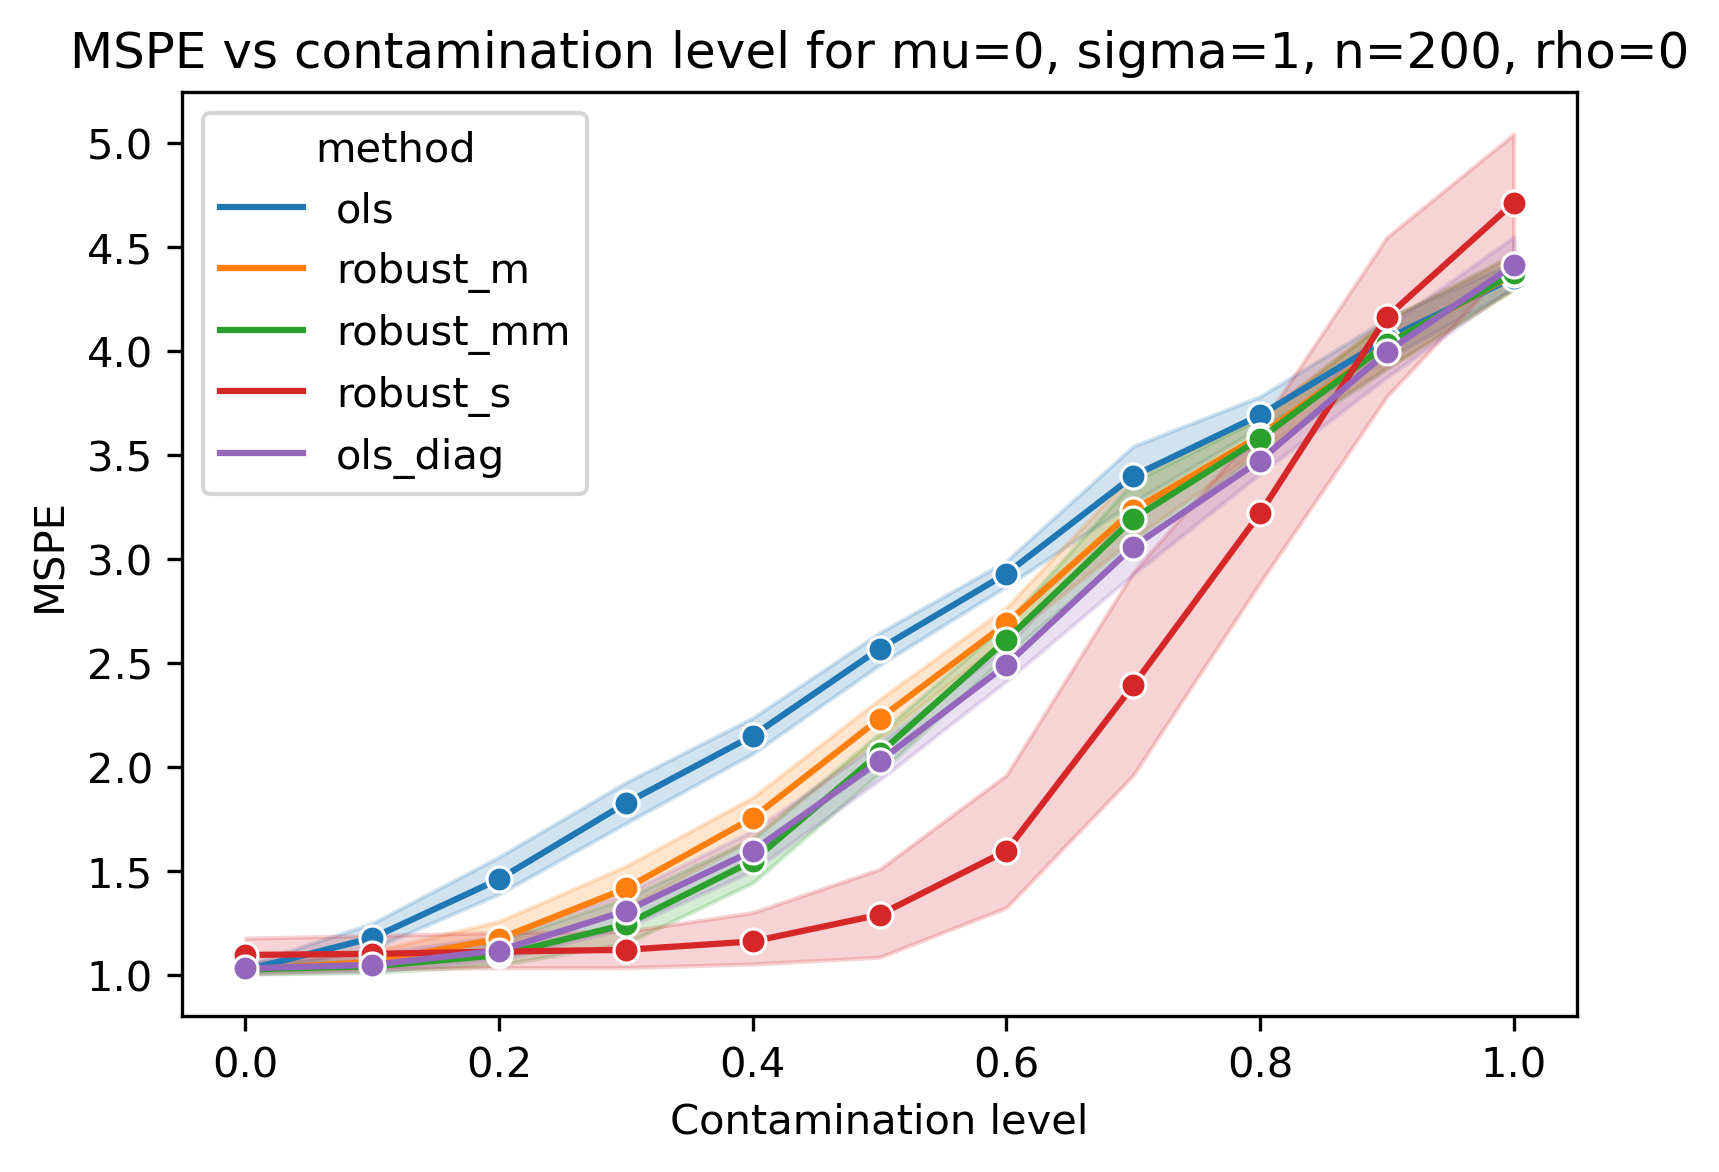

In [7]:
# plotting for mpse
df_mspe_mu0_sigma1_n200_rho0 = df_mpse[(df_mpse['ctam_mu'] == 0) & (df_mpse['ctam_sigma'] == 1)  & (df_mpse['ctam_rho'] == 0)]
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
sns.lineplot(data=df_mspe_mu0_sigma1_n200_rho0, x='contamination_level', y='mpse', hue='method', marker='o', ax=ax)
plt.title('MSPE vs contamination level for mu=0, sigma=1, n=200, rho=0')
plt.xlabel('Contamination level')
plt.ylabel('MSPE')
plt.show()

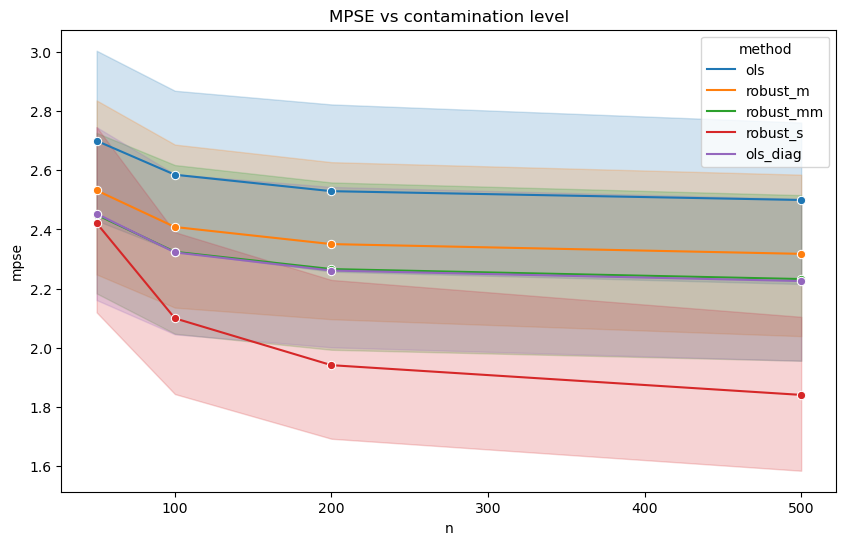

In [8]:
# plotting for mpse
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=df_mpse, x='n', y='mpse', hue='method', marker='o', ax=ax)
plt.title('MPSE vs contamination level')
plt.show()

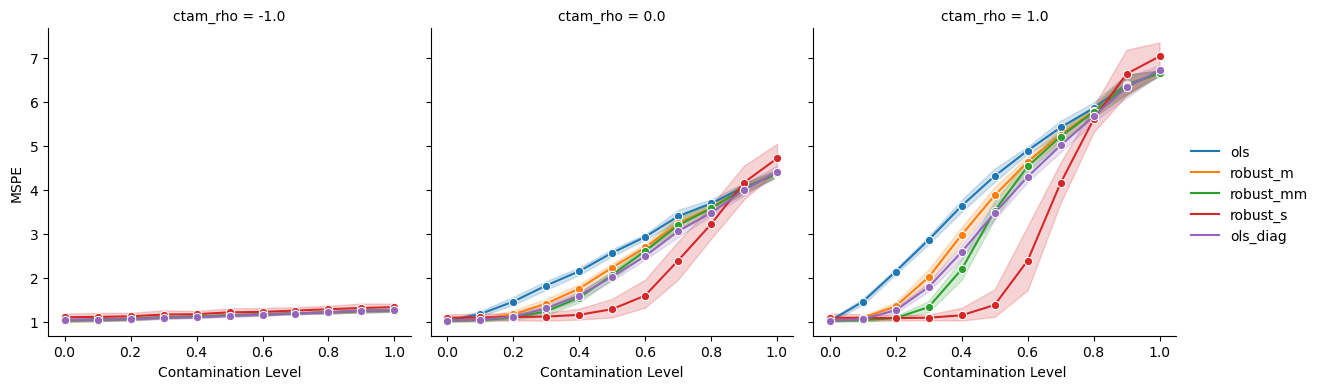

In [9]:
# facet by rho
df_mpse_3rho = df_mpse[df_mpse['ctam_rho'].isin([-1, 0, 1])]
g = sns.FacetGrid(df_mpse_3rho, col='ctam_rho', col_wrap=3, height=4, aspect=1)
g.map(sns.lineplot, 'contamination_level', 'mpse', 'method', marker='o')
g.set_axis_labels('Contamination Level', 'MSPE')
g.add_legend()
plt.show()

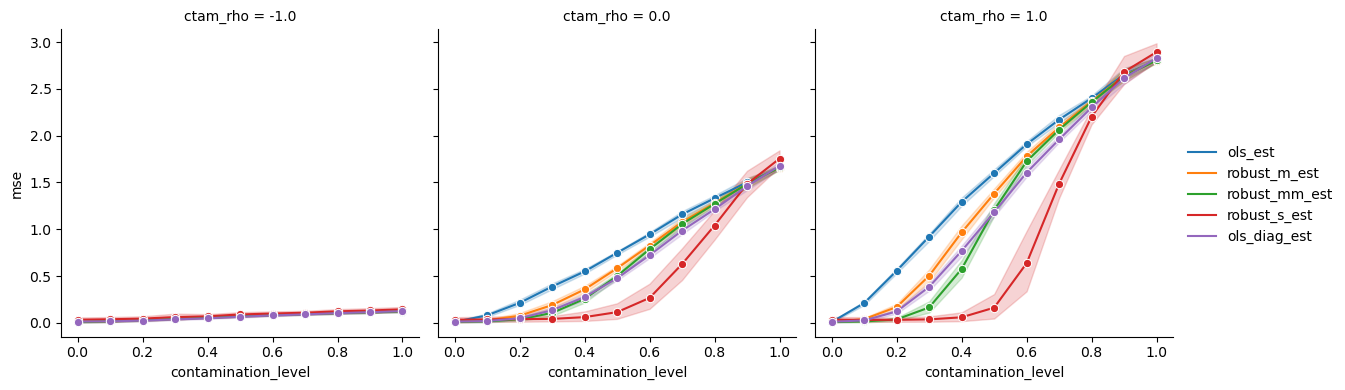

In [10]:
df_mse = df[feature_columns + mse_columns]
df_mse = df_mse.melt(id_vars=feature_columns, value_vars=mse_columns, var_name='method', value_name='mse')
df_mse['method'] = df_mse['method'].str.replace('_mse', '')

df_mse_3rho = df_mse[df_mse['ctam_rho'].isin([-1, 0, 1])]
g = sns.FacetGrid(df_mse_3rho, col='ctam_rho', col_wrap=3, height=4, aspect=1)
g.map(sns.lineplot, 'contamination_level', 'mse', 'method', marker='o')
g.add_legend()
plt.show()

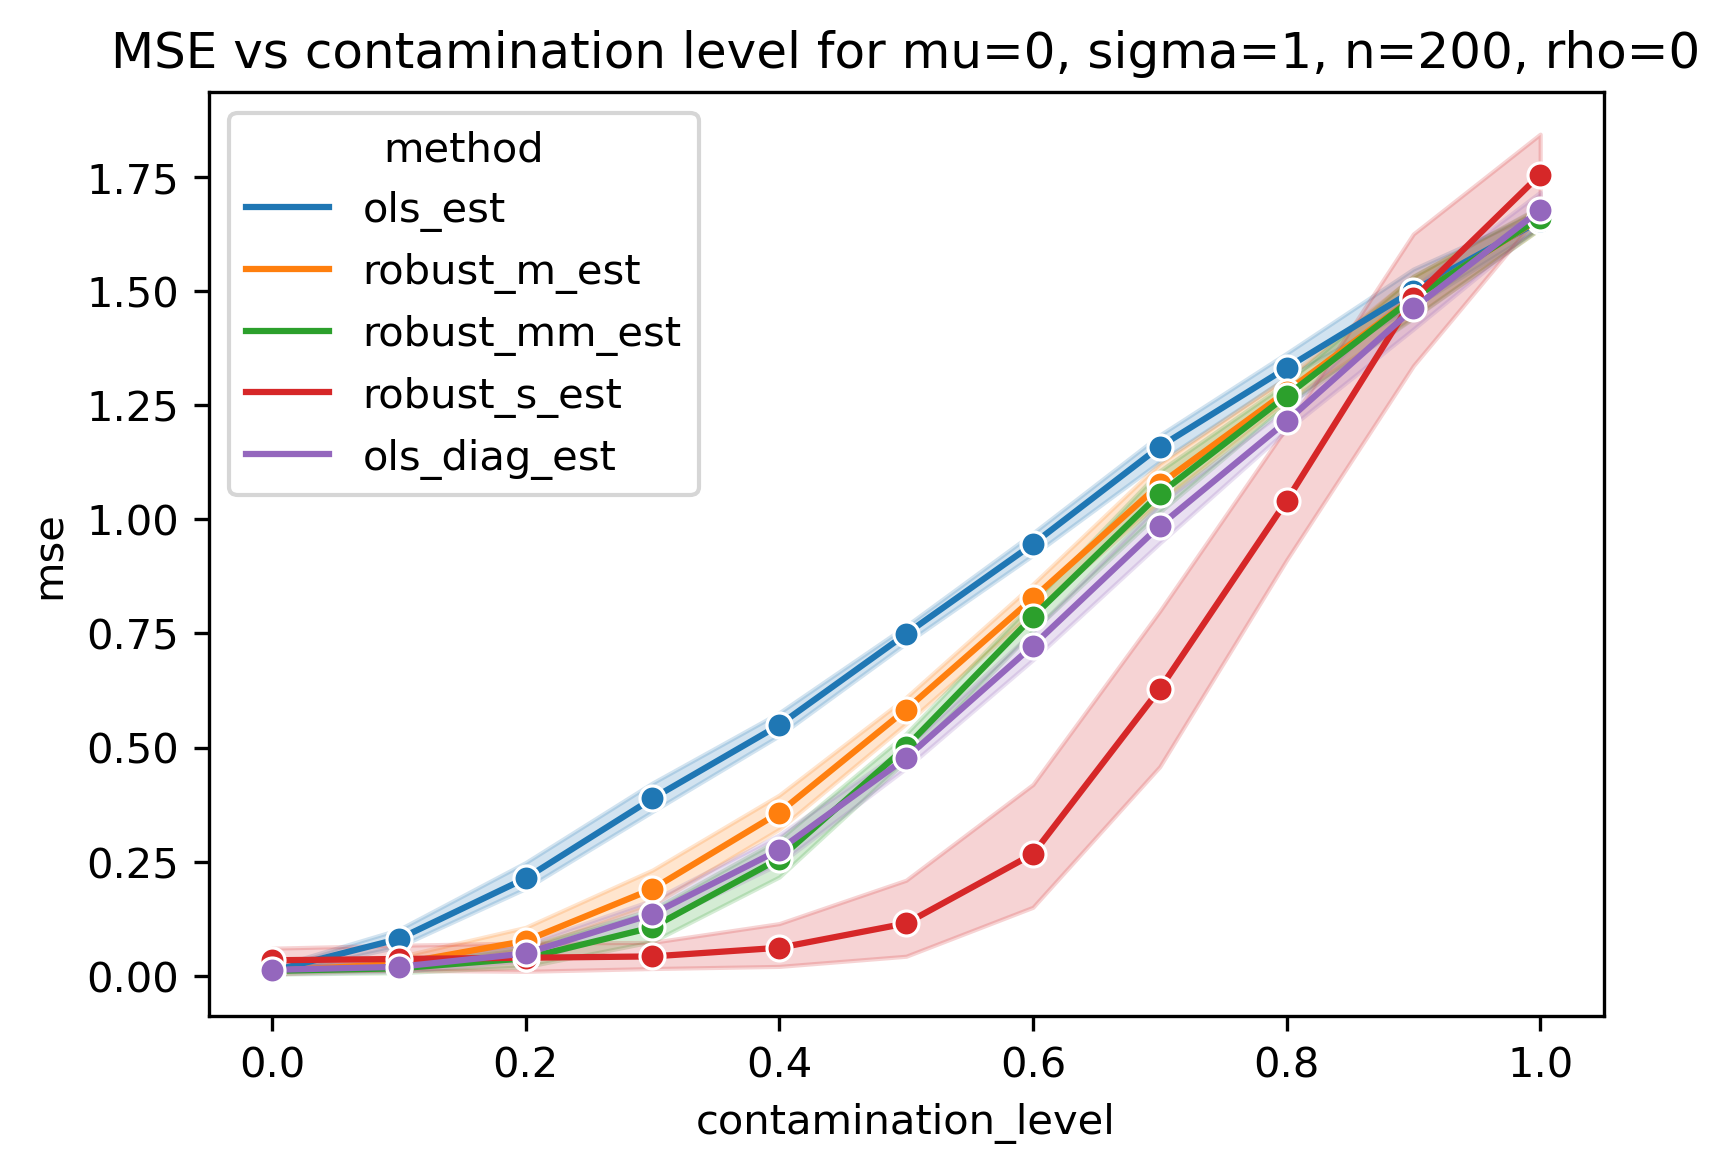

In [11]:
df_mse = df[feature_columns + mse_columns]
df_mse = df_mse.melt(id_vars=feature_columns, value_vars=mse_columns, var_name='method', value_name='mse')
df_mse['method'] = df_mse['method'].str.replace('_mse', '')

df_mse_mu0_sigma1_n200_rho0 = df_mse[(df_mse['ctam_mu'] == 0) & (df_mse['ctam_sigma'] == 1)  & (df_mse['ctam_rho'] == 0)]
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
sns.lineplot(data=df_mse_mu0_sigma1_n200_rho0, x='contamination_level', y='mse', hue='method', marker='o', ax=ax)
plt.title('MSE vs contamination level for mu=0, sigma=1, n=200, rho=0')
plt.show()